<a href="https://colab.research.google.com/github/fredericokrohling/1.-USP-Python-Quinzena-2/blob/main/Aula6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd

#lendo o arquivo cidade 1
with open("/content/cidade_1_aula6.txt") as f:
  cidade_1_lines = f.readlines()
for i in range(0,len(cidade_1_lines)):
  if cidade_1_lines[i] == "?\n":
    cidade_1_lines[i] = (float(cidade_1_lines[i-1])+float(cidade_1_lines[i+1]))/2
cidade_1 = np.array([float(x) for x in cidade_1_lines])

#lendo arquivo cidade2

with open("/content/cidade_2_aula6.txt") as f:
  cidade_2_lines = f.readlines()
cidade_2 = np.array([float(x) for x in cidade_2_lines])




Media de temperatura da cidade 1 eh igual a: 24.012638726623994
Media de temperatura da cidade 2 eh igual a: 27.82079587783114


<ipython-input-25-836f5bb7b313>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cidade_1, bins=20, color="purple")
<ipython-input-25-836f5bb7b313>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cidade_2, bins=20, color="green")


<Axes: ylabel='Density'>

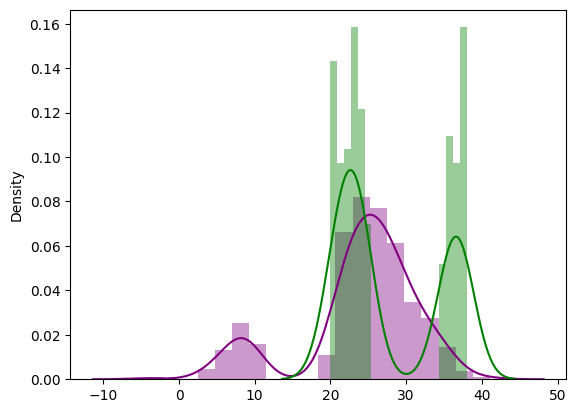

In [25]:
import seaborn as sns # faz o histograma
from matplotlib import pyplot as plt


print('Media de temperatura da cidade 1 eh igual a:', np.mean(cidade_1))
print('Media de temperatura da cidade 2 eh igual a:', np.mean(cidade_2))

sns.distplot(cidade_1, bins=20, color="purple")
sns.distplot(cidade_2, bins=20, color="green")



        Cidade  Temperatura
0      SCarlos     9.404436
1      SCarlos    24.284961
2      SCarlos    28.210288
3      SCarlos     4.463036
4      SCarlos    25.764866
..         ...          ...
725  Rio Claro    21.498136
726  Rio Claro    37.876996
727  Rio Claro    24.468403
728  Rio Claro    21.403285
729  Rio Claro    22.667860

[730 rows x 2 columns]


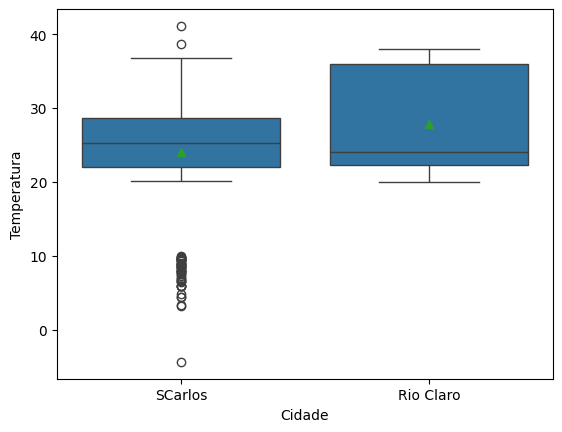

In [26]:
# primeiro passo transformar os dados das cidades em dataframes
import pandas as pd
import numpy as np

cidades = pd.DataFrame({'Cidade': (['SCarlos']*len(cidade_1)) + (['Rio Claro']*len(cidade_2)),
                        'Temperatura': np.concatenate([cidade_1, cidade_2])})
sns.boxplot(x='Cidade', y='Temperatura', data=cidades, showmeans=True)

print(cidades)

# Cidade 1 teve variancia menor que a 2. Media da cidade 2 maior, causada por outliers


In [27]:
import numpy as pd
#na funcao argwhere contamos a quantidade de dias quentes
dias_quentes_1 = np.argwhere(cidade_1>25)
print("Numero de dias quentes da cidade 1:" , len(dias_quentes_1))
dias_quentes_2 = np.argwhere(cidade_2>25)
print("Numero de dias quentes da cidade 2:", len(dias_quentes_2))

Numero de dias quentes da cidade 1: 192
Numero de dias quentes da cidade 2: 137


In [28]:
#jogadores de futebol, como vamos ler direto do excel vamos utilizar o panda, pois ha uma funcao para ler direto
import pandas as pd
players = pd.read_csv("jogadores_exercicio1_aula6.csv")

#vamos calcular os 4 momentos media, variancia, obliquidade (skew) e achatamento (kurtosis), para cada atributo
#do tipo numerico (float) do conjunto

#media
avg_height = players['height'].mean()
avg_weight = players['weight'].mean()
avg_age = players['age'].mean()

print(" Media de altura é:", round((avg_height),2),"m", "\n", "Media de peso: ",
      round((avg_weight),2), "kg", "\n", "Media de idade: ", round((avg_age),2))
print("\n")

#variancia
var_height = players['height'].var()
var_weight = players['weight'].var()
var_age = players['age'].var()
print(" Variancia da altura é:", round((var_height),5),"m", "\n", "Variancia do peso: ",
      round((var_weight),5), "kg", "\n", "Variancia da idade: ", round((var_age),5))
print("\n")

#obliquidade
skw_height = players['height'].skew()
skw_weight = players['weight'].skew()
skw_age = players['age'].skew()
print(" Obliquidade da altura é:", round((skw_height),5),"m", "\n", "Obliquidade do peso: ",
      round((skw_weight),5), "kg", "\n", "Obliquidade da idade: ", round((skw_age),5))
print("\n")

#kurtosis
ku_height = players['height'].kurtosis()
ku_weight = players['weight'].kurtosis()
ku_age = players['age'].kurtosis()
print(" kurtosis da altura é:", round((ku_height),5),"m", "\n", "kurtosis do peso: ",
      round((ku_weight),5), "kg", "\n", "kurtosis da idade: ", round((ku_age),5))
print("\n")


 Media de altura é: 1.82 m 
 Media de peso:  76.45 kg 
 Media de idade:  34.31


 Variancia da altura é: 0.00367 m 
 Variancia do peso:  41.28154 kg 
 Variancia da idade:  26.46501


 Obliquidade da altura é: -0.12008 m 
 Obliquidade do peso:  0.03028 kg 
 Obliquidade da idade:  0.29989


 kurtosis da altura é: -0.43218 m 
 kurtosis do peso:  -0.10867 kg 
 kurtosis da idade:  -0.33402




Obliquidade: -0.11956457471844086
25%: 1.778
50%: 1.8288
75%: 1.8542
Media 1.8201639999999997
Mediana 1.8288


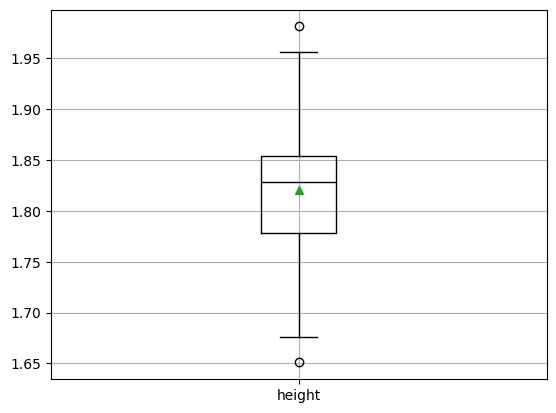

In [29]:
# Questao 4 gerar o boxplot do atributo altura analisando se os dados estao
# centrados na media e estimar os quartis do atributo

from scipy import stats
#boxplot e analise da altura, para variar vamos usar o scipy
# vamos usar o calculo da obliquidade para verificar se existe simetria ou nao
# ou obliquidade acentuada para direita ou esquerda

boxplot_height = players.boxplot(column='height', showmeans=True, color="black")
print('Obliquidade: {}'.format(stats.skew(players.height)))

print('25%:', players.height.quantile(0.25))
print('50%:', players.height.quantile(0.5))
print('75%:', players.height.quantile(0.75))
print('Media', players.height.mean())
print('Mediana', players.height.median())

#Obliquidade eh muito pequena, proximo a zero, tem cauda a esquerda da mediana,
#porem pouco significativa.




In [31]:
# Leia o arquivo players e o combine com oi dataframe existente.
# Caso o valor nao esteja disponivel para algum jogador, substitua por NaN, pela
# media ou pelo valor mais comum
import pandas as pd
players_atributes = pd.read_csv("/content/player_attributes1.csv")
# Na proxima linha estamos fazendo um merge com o anterior, usando o atributo em comum
jogadores = players.merge(players_atributes, how='right', on='player_api_id')

# Na linha abaixo estamos preenchendo valores faltantes do novo arquivo, com a moda
# caso o atributo nominal, caso contratio com a media
jogadores.apply(lambda x:x.fillna(
    x.mode()[0] if x.dtype  == 'object' else x.mean(), axis=0, inplace=True))

for column in jogadores.columns:
  if 'id' not in column:
    print('Atributo: ', column, ' Resultado: ', jogadores[column].mode()[0])


Atributo:  player_name  Resultado:  Luan
Atributo:  birthday  Resultado:  1979-12-03 00:00:00
Atributo:  height  Resultado:  1.8288
Atributo:  weight  Resultado:  79.83225712000001
Atributo:  age  Resultado:  34
Atributo:  Unnamed: 0  Resultado:  451
Atributo:  date  Resultado:  2016-04-14 00:00:00
Atributo:  overall_rating  Resultado:  64.0
Atributo:  potential  Resultado:  66.0
Atributo:  preferred_foot  Resultado:  right
Atributo:  attacking_work_rate  Resultado:  medium
Atributo:  defensive_work_rate  Resultado:  medium
Atributo:  crossing  Resultado:  58.0
Atributo:  finishing  Resultado:  25.0
Atributo:  heading_accuracy  Resultado:  68.0
Atributo:  short_passing  Resultado:  64.0
Atributo:  volleys  Resultado:  47.80298507462687
Atributo:  dribbling  Resultado:  71.0
Atributo:  curve  Resultado:  51.080597014925374
Atributo:  free_kick_accuracy  Resultado:  58.0
Atributo:  long_passing  Resultado:  58.0
Atributo:  ball_control  Resultado:  62.0
Atributo:  acceleration  Resultado